In [1]:
# ---
# # Parking Spot Detection Model - Inference Notebook
# 
# This notebook is used for testing and validating the custom-trained YOLOv8 model
# for detecting occupied and empty parking spaces.
# 
# **Author:** Shakhzod Karimov
# ---

# Step 1: Import all necessary libraries for this analysis.
# importing libraries for the model (ultralytics), image processing (cv2, PIL),
# and for displaying results within the notebook (IPython).
print("Importing libraries...")
from ultralytics import YOLO
from PIL import Image as PILImage
from IPython.display import display
import cv2
import os
print("Libraries imported successfully.\n")

Importing libraries...
Libraries imported successfully.



In [2]:
# Step 2: Define the model path and load the trained model.
# The 'best.pt' file should be in the same directory as this notebook.
model_path = 'best.pt'
print(f"Attempting to load model from: {model_path}")

# using a try-except block to gracefully handle any errors during model loading.
try:
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found. Please ensure '{model_path}' is in the correct directory.")
    
    model = YOLO(model_path)
    print(" Model loaded successfully!")
except Exception as e:
    print(f" Error loading model: {e}")

Attempting to load model from: best.pt


/opt/anaconda3/envs/parking_app_env/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


 Model loaded successfully!


Running inference on image: deploy_test.jpg...


image 1/1 /Users/karimovshakhzod/Downloads/streamlit_parking_app/deploy_test.jpg: 416x640 23 emptys, 32 occupieds, 212.3ms
Speed: 12.7ms preprocess, 212.3ms inference, 15.9ms postprocess per image at shape (1, 3, 416, 640)
Inference complete. Processing results...
Converting image for display...
 Displaying annotated image:


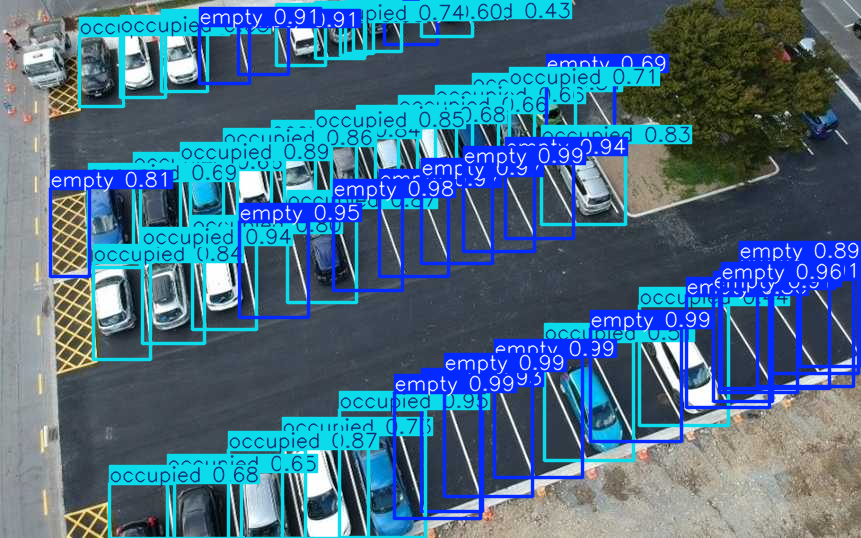

In [3]:
# Step 3: Define the image to be tested and run the prediction.
# The test image should also be in the same directory.
test_image_path = 'deploy_test.jpg' 
print(f"Running inference on image: {test_image_path}...\n")

# A try-except block here will catch any errors that might occur during the prediction phase.
try:
    # Check if the test image exists before trying to run the model on it.
    if not os.path.exists(test_image_path):
         raise FileNotFoundError(f"Test image not found. Please ensure '{test_image_path}' is in the correct directory.")

    # Running the model is a single, simple call.
    results = model(test_image_path)
    print("Inference complete. Processing results...")

    # The result object contains a lot of information. use the .plot() method
    # which conveniently draws the bounding boxes and labels onto the image.
    # Note: .plot() returns an image in BGR format (standard for OpenCV).
    annotated_image_bgr = results[0].plot()

    # To display the image correctly in this notebook (and in most display libraries),
    #need to convert the color space from BGR to RGB.
    print("Converting image for display...")
    annotated_image_rgb = cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB)

    # Finally, use the PIL (Pillow) library and IPython's display function
    # to show the final annotated image directly in the notebook output.
    print(" Displaying annotated image:")
    display(PILImage.fromarray(annotated_image_rgb))

except Exception as e:
    print(f" An error occurred during prediction or visualization: {e}")